In [72]:
import pandas as pd
import nltk
import re
import seaborn as sns
from nltk.stem.wordnet import WordNetLemmatizer
import spacy 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

# loading spacy model for cleaning up lyrics
nlp = spacy.load('en_core_web_sm') # run "python -m spacy download en_core_web_sm" in terminal



# Billboard 2018 data

In [74]:
# loading  billboard data
top_2018 = pd.read_csv('top100_2018.csv', index_col=0)

# changing alternative to Rock
def new_genres(genre):
    if genre == 'Alternative':
        return 'Rock'
    else: return genre
top_2018['Genre'] = top_2018['Genre'].apply(new_genres)
    
top_2018.head(6)

,Artist,Song,Lyrics,Genre,Charting Number
0,Drake,God's Plan,Yeah they wishin and wishin and wishin and wis...,Rap,1
1,Ed Sheeran,Perfect,I found a love for me Darling just dive right ...,Pop,2
2,Bebe Rexha,Meant To Be,Baby lay on back and relax Kick your pretty f...,Pop,3
3,Camila Cabello,Havana,Havana ooh nana ay Half of my heart is in Hav...,Pop,4
4,Post Malone,Rockstar,Hahahahaha Tank God Ayy Ive been fuckin hoes...,Rap,5
5,Post Malone,Psycho,Damn my AP goin psycho lil mama bad like Mich...,Rap,6


# Genre distribution

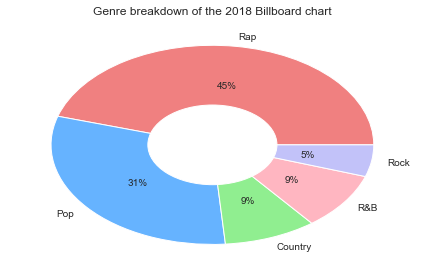

In [75]:
# frequency of each genre
genre_counts = top_2018['Genre'].value_counts()
# plotting 
colors = ['lightcoral', '#66b3ff','lightgreen','lightpink', '#c2c2f9']
plt.pie(genre_counts.values, labels = genre_counts.index, autopct='%1.0f%%', colors=colors)
centre_circle = plt.Circle((0,0),0.40,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Genre breakdown of the 2018 Billboard chart')
plt.tight_layout()
plt.savefig('plots/Genre_breakdown_2018.png', dpi=480)
plt.show()


# Visualizing number of words in each lyrics 

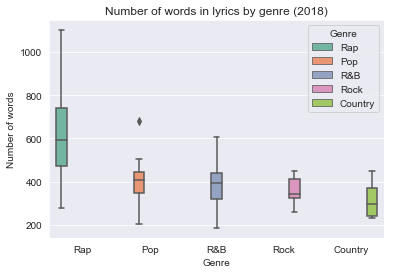

In [76]:
def nb_words(lyric):
    count=0
    for word in lyric.split():
        count+=1    
    return count 
    
top_2018['Number of words'] = top_2018['Lyrics'].apply(nb_words)
sns.set_style("darkgrid")
ax = sns.boxplot(x="Genre", y="Number of words", hue="Genre",data=top_2018, palette="Set2")
plt.title('Number of words in lyrics by genre (2018)')
plt.savefig('plots/Box_plot of words per song 2018.png', dpi=480)

# Visualizing genre spread

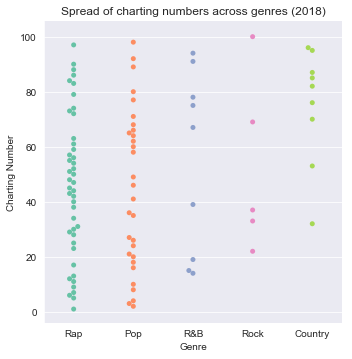

In [77]:
sns.catplot(x="Genre", y="Charting Number", kind="swarm", data=top_2018, palette="Set2")
sns.set_style('darkgrid')
plt.title('Spread of charting numbers across genres (2018)')
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('plots/spread of genres 2018.png', dpi=480)
plt.show()


genre_counts


# indexing dataframe by genre

In [78]:
by_genre = top_2018.groupby('Genre')['Lyrics'].sum()
by_genre_df = pd.DataFrame(by_genre)
genre_counts = top_2018['Genre'].value_counts()
indices = by_genre_df.index
genre_counts = genre_counts.reindex(indices)
by_genre_df['genre_count'] = genre_counts.values
by_genre_df.head()

,Lyrics,genre_count
Genre,,
Country,I can still shut down a party I can hang with ...,9
Pop,I found a love for me Darling just dive right ...,30
R&B,Ooh dont we look good together Theres a reason...,9
Rap,Yeah they wishin and wishin and wishin and wis...,44
Rock,Just a young gun with a quick fuse I was uptig...,5


In [79]:
# some word statistics

In [80]:
lyrics_split = top_2018['Lyrics'].apply(lambda x: x.split())
top_2018['lyrics_set'] = lyrics_split.apply(lambda x: set(x))
top_2018['lyrics_set'] = top_2018['lyrics_set'].apply(lambda x: " ".join(x))
by_lyrics_set = top_2018.groupby('Genre')['lyrics_set'].sum()
by_genre_df['lyrics_set'] = by_lyrics_set

def make_word_list(lyrics):
    word_list = []
    lyrics=lyrics.split()
    for word in lyrics:
        word_list.append(word)
    return word_list
def list_to_set(word_list):
    return set(word_list)
def return_length(words):
    return len(words)

genre_detailed = by_genre_df
by_genre_df['word_lists'] = by_genre_df['Lyrics'].apply(make_word_list)
by_genre_df['word_sets'] = by_genre_df['word_lists'].apply(list_to_set)
genre_detailed['total_words'] = genre_detailed['word_lists'].apply(return_length)
genre_detailed['total_unique_words'] = genre_detailed['word_sets'].apply(return_length)
genre_detailed['average_total_words'] = genre_detailed['total_words']/genre_detailed['genre_count']
genre_detailed['average_unique_words'] = genre_detailed['total_unique_words']/genre_detailed['genre_count']

by_genre_df.head()

,Lyrics,genre_count,lyrics_set,word_lists,word_sets,total_words,total_unique_words,average_total_words,average_unique_words
Genre,,,,,,,,,
Country,I can still shut down a party I can hang with ...,9,your down when Little you hard tshirt How fine...,"[I, can, still, shut, down, a, party, I, can, ...","{noThe, break, for, your, left, saving, Did, t...",2776,561,308.444444,62.333333
Pop,I found a love for me Darling just dive right ...,30,mine for knew your slow darling hope mess when...,"[I, found, a, love, for, me, Darling, just, di...","{Kick, hope, years, tellin, graduate, were, se...",11969,1381,398.966667,46.033333
R&B,Ooh dont we look good together Theres a reason...,9,turn for your off slow down tonight when our w...,"[Ooh, dont, we, look, good, together, Theres, ...","{spend, for, your, left, slow, because, guess,...",3513,586,390.333333,65.111111
Rap,Yeah they wishin and wishin and wishin and wis...,44,Without brothers movin for bed Do some down wh...,"[Yeah, they, wishin, and, wishin, and, wishin,...","{brothers, sideways, Kick, glide, hope, gggott...",26689,3646,606.568182,82.863636
Rock,Just a young gun with a quick fuse I was uptig...,5,clapping for your dreaming box you were leave ...,"[Just, a, young, gun, with, a, quick, fuse, I,...","{break, for, your, left, invisible, years, tel...",1783,471,356.600000,94.200000


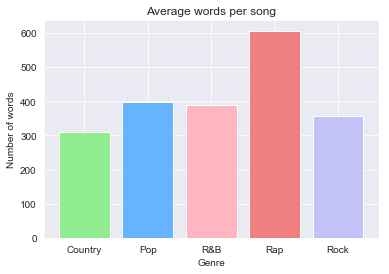

In [81]:
import numpy as np
import seaborn as sns
# genres 
genres = genre_detailed.index.values
values=genre_detailed['average_total_words'].values
# the x locations for the groups
ind = np.arange(len(genres))  
# the width of the bars
width = 0.35       
colors = ['lightgreen','#66b3ff', 'lightpink', 'lightcoral', '#c2c2f9']

plt.bar(ind, genre_detailed['average_total_words'].values, color= colors)
sns.set_style()

plt.title('Average words per song')
plt.xticks(ind, genres)
plt.ylabel('Number of words')
plt.xlabel('Genre')

plt.show
plt.savefig('Average words per song 2018.png', dpi=480)

In [82]:
genre_detailed.index

Index(['Country', 'Pop', 'R&B', 'Rap', 'Rock'], dtype='object', name='Genre')

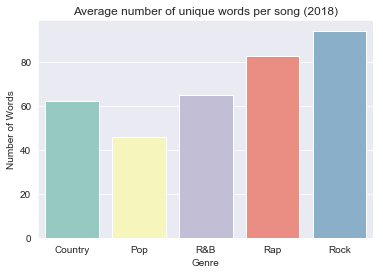

In [98]:
ar

# cleaning up lyrics for possible genre prediction

In [59]:
# removing all symbols ($#@)
def remove_alpha(sentence):
    #return re.sub(r'[^\w]', '', sentence)
    return re.sub('[^A-Za-z]+', ' ', sentence.lower())

def make_word_list(lyrics):
    word_list = []
    for word in lyrics:
        word_list.append(word)
    return word_list
            

def clean(text):
    word_list = [] 
    doc = nlp(text)
    for token in doc:
        if (token.is_stop == False):
            # lemmentizing it 
            token = token.lemma_
            # above returns _pron_ for pronoun etc.
            if token[0] != '-' and len(token) != 1:
                word_list.append(token)
        
    return word_list

genre_detailed['no_stop_lyrics'] = genre_detailed['Lyrics'].apply(clean)
genre_detailed.head()

,Lyrics,genre_count,lyrics_set,word_lists,word_sets,total_words,total_unique_words,average_total_words,average_unique_words,no_stop_lyrics
Genre,,,,,,,,,,
Alternative,Just a young gun with a quick fuse I was uptig...,5,clapping for your dreaming box you were leave ...,"[Just, a, young, gun, with, a, quick, fuse, I,...","{break, for, your, left, invisible, years, tel...",1783,471,356.600000,94.200000,"[just, young, gun, quick, fuse, uptight, wanna..."
Country,I can still shut down a party I can hang with ...,9,your down when Little you hard tshirt How fine...,"[I, can, still, shut, down, a, party, I, can, ...","{noThe, break, for, your, left, saving, Did, t...",2776,561,308.444444,62.333333,"[shut, party, hang, anybody, drink, whiskey, r..."
Pop,I found a love for me Darling just dive right ...,30,mine for knew your slow darling hope mess when...,"[I, found, a, love, for, me, Darling, just, di...","{Kick, hope, years, tellin, graduate, were, se...",11969,1381,398.966667,46.033333,"[find, love, darling, dive, right, follow, lea..."
R&B,Ooh dont we look good together Theres a reason...,9,turn for your off slow down tonight when our w...,"[Ooh, dont, we, look, good, together, Theres, ...","{spend, for, your, left, slow, because, guess,...",3513,586,390.333333,65.111111,"[ooh, not, look, good, there, reason, watch, n..."
Rap,Yeah they wishin and wishin and wishin and wis...,44,Without brothers movin for bed Do some down wh...,"[Yeah, they, wishin, and, wishin, and, wishin,...","{brothers, sideways, Kick, glide, hope, gggott...",26689,3646,606.568182,82.863636,"[yeah, wishin, wishin, wishin, wishin, wishin,..."


# cleaning for creating word clouds

In [60]:

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

genre_detailed['word_cloud_lyrics'] = genre_detailed['word_lists'].apply(lambda x: [item for item in x if item not in stop])

def clean_word_cloud(text):
    #text =  " ".join(text_list)
    doc = nlp(text)
    word_list=[]
    for token in doc:
        if (token.is_stop == False):
            token = token.lemma_
            # above returns _pron_ for pronoun etc.
            if token[0] != '-' and len(token) != 1:
                word_list.append(token)
    return word_list

genre_detailed['word_cloud_lyrics'] = genre_detailed['lyrics_set'].apply(clean_word_cloud)
#genre_detailed['word_cloud_lyrics'] = genre_detailed['word_lists'].apply(lambda x: [item for item in x if item not in stop])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sidhant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
genre_detailed.index

Index(['Alternative', 'Country', 'Pop', 'R&B', 'Rap'], dtype='object', name='Genre')

# WordClouds

NameError: name 'sgtitle' is not defined

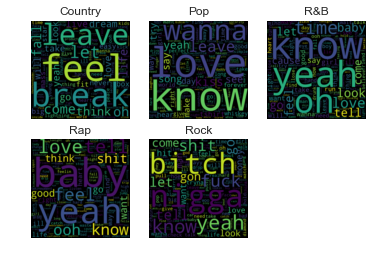

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

#genre_detailed['lyrics_set'] = genre_detailed['word_cloud_lyrics'].apply(lambda x: x.split())
# string of lyrics 
country_lyrics_cleaned = " ".join(genre_detailed['word_cloud_lyrics'][0])
pop_lyrics_cleaned = " ".join(genre_detailed['word_cloud_lyrics'][1])
rnb_lyrics_cleaned = " ".join(genre_detailed['word_cloud_lyrics'][2])
rap_lyrics_cleaned = " ".join(genre_detailed['word_cloud_lyrics'][3])
# i included alternative in rock for 2008 
rock_lyrics_cleaned = " ".join(genre_detailed['word_cloud_lyrics'][4])

wordcloud = WordCloud(collocations=False,width = 680, height = 680, margin = 0).generate(country_lyrics_cleaned)
plt.subplot(2,3,1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Country')
plt.axis('off')
plt.margins(x=0,y=0)

wordcloud = WordCloud(collocations=False,width = 680, height = 680, margin = 0).generate(pop_lyrics_cleaned)
plt.subplot(2,3,2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Pop')
plt.axis('off')
plt.margins(x=0,y=0)

wordcloud = WordCloud(collocations=False,width = 680, height = 680, margin = 0).generate(rnb_lyrics_cleaned)
plt.subplot(2,3,3)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('R&B')
plt.axis('off')
plt.margins(x=0,y=0)

wordcloud = WordCloud(collocations=False,width = 680, height = 680, margin = 0).generate(rap_lyrics_cleaned)
plt.subplot(2,3,4)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Rap')
plt.axis('off')
plt.margins(x=0,y=0)


wordcloud = WordCloud(collocations=False,width = 680, height = 680, margin = 0).generate(rock_lyrics_cleaned)
plt.subplot(2,3,5)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Rock')
plt.axis('off')
plt.margins(x=0,y=0)

sgtitle('Word Clouds of lyrics for each genre')
plt.savefig('wordclouds_2018.png', dpi=480)
plt.show()
